# Linear regression with Pytorch

### 1. Importing relevant libraries

In [2]:
# !pip install matplotlib==3.8.2
# !pip install numpy==1.26.2
# !pip install pandas==2.1.4
# !pip install scikit_learn==1.4.2
# !pip install seaborn==0.13.2
# !pip install torch==2.2.2
# !pip install torchvision==0.17.2

In [3]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
df = pd.read_csv("../Input/data.csv")

In [5]:
df.tail(3) 

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0
1999,2015,999961,414-1496,Male,37,73,no,no,326.70,10.3,37.03,89,6,3.0,1,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [7]:
df.shape

(2000, 16)

#### 2. Data Cleaning

In [8]:
df = df.drop(["year", "customer_id", "phone_no"], axis=1) # removing the unwanted features

In [9]:
df.shape

(2000, 13)

In [10]:
print(df.columns)  

Index(['gender', 'age', 'no_of_days_subscribed', 'multi_screen',
       'mail_subscribed', 'weekly_mins_watched', 'minimum_daily_mins',
       'maximum_daily_mins', 'weekly_max_night_mins', 'videos_watched',
       'maximum_days_inactive', 'customer_support_calls', 'churn'],
      dtype='object')


##### Null Value Treatment: If we have null values then we need to work on that before feeding it to our model

In [11]:
#checking null values in data
df.isnull().sum()

gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [12]:
df1 = df.dropna()

In [13]:
df1.isnull().sum()

gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

In [14]:
df1.shape 

(1918, 13)

### 3.Data Preprocessing

In [15]:
df1[['gender', 'multi_screen', 'mail_subscribed']]

,gender,multi_screen,mail_subscribed
0,Female,no,no
1,Female,no,no
2,Female,no,no
3,Female,no,yes
4,Female,no,no
...,...,...,...
1990,Male,no,no
1991,Male,yes,yes
1992,Female,no,yes
1996,Male,no,no


*Before feeding this to the model we need to encode the categroical variables*

In [16]:
label_encoder = preprocessing.LabelEncoder()
df1['gender']= label_encoder.fit_transform(df1['gender'])
df1['multi_screen']= label_encoder.fit_transform(df1['multi_screen'])
df1['mail_subscribed']= label_encoder.fit_transform(df1['mail_subscribed'])

In [17]:
df1.sample(4)

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
52,0,26,77,0,0,244.50,6.7,27.71,66,3,2.0,2,0.0
978,0,37,68,0,0,320.85,8.4,36.36,97,3,3.0,1,1.0
1315,0,58,90,0,1,225.15,5.8,25.52,97,4,2.0,1,0.0
1796,1,62,165,0,0,324.90,12.4,36.82,123,8,4.0,0,0.0


*Independent columns are used for feeding the model for training by keeping it into separate dataframe*

In [18]:
x = df1.drop("no_of_days_subscribed", axis=1) 
X = pd.DataFrame(x)

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1918 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  1918 non-null   int32  
 1   age                     1918 non-null   int64  
 2   multi_screen            1918 non-null   int32  
 3   mail_subscribed         1918 non-null   int32  
 4   weekly_mins_watched     1918 non-null   float64
 5   minimum_daily_mins      1918 non-null   float64
 6   maximum_daily_mins      1918 non-null   float64
 7   weekly_max_night_mins   1918 non-null   int64  
 8   videos_watched          1918 non-null   int64  
 9   maximum_days_inactive   1918 non-null   float64
 10  customer_support_calls  1918 non-null   int64  
 11  churn                   1918 non-null   float64
dtypes: float64(5), int32(3), int64(4)
memory usage: 172.3 KB


*Scaling is a crucial preprocessing step that can help improve the performance and convergence of many machine learning algorithms. It ensures that all features contribute equally to the model, prevents features with larger scales from dominating*

In [20]:
#sc = StandardScaler()
sc=MinMaxScaler()
X = sc.fit_transform(X)
X = sc.transform(X)

In [21]:
X

array([[ 0.        , -0.27685547,  0.        , ...,  0.11111111,
         0.01234568,  0.        ],
       [ 0.        , -0.27612305,  0.        , ...,  0.08333333,
         0.02469136,  0.        ],
       [ 0.        , -0.26977539,  0.        , ...,  0.11111111,
         0.0617284 ,  1.        ],
       ...,
       [ 0.        , -0.27539062,  0.        , ...,  0.08333333,
         0.03703704,  0.        ],
       [ 1.        , -0.2746582 ,  0.        , ...,  0.08333333,
         0.01234568,  0.        ],
       [ 1.        , -0.27661133,  0.        , ...,  0.08333333,
         0.01234568,  1.        ]])

In [22]:
X.shape

(1918, 12)

In [23]:
n_samples, n_features = X.shape   # Storing the values in two parts as it will easy later to feed the model 

*Keeping the output column in a separate dataframe*

In [24]:
Y = df1["no_of_days_subscribed"]
Y.tail(10)

1985     73
1986     42
1987    157
1988    133
1989    144
1990     61
1991     50
1992    119
1996    127
1999     73
Name: no_of_days_subscribed, dtype: int64

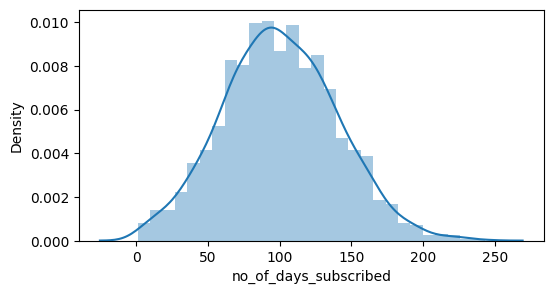

In [25]:
plt.figure(figsize=(6, 3))
sns.distplot(Y)
plt.show()

*It follows a normal distribution which lead to more accurate, interpretable, and robust models Many statistical models, such as linear regression, assume that the residuals (errors) follow a normal distribution. This assumption ensures that the estimates of the coefficients are unbiased and efficient.*

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [27]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


- y_train & y_test are of type series. As we need to convert everything in numpy array, **.values** is used

In [28]:
print(type(X_train))
print(type(X_test))
print(type(y_train.values))
print(type(y_test.values))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [29]:
y_train

867      90
1700     93
1791    181
727      72
1148    155
       ... 
1195    139
1359    177
925     126
1529    112
1191    117
Name: no_of_days_subscribed, Length: 1438, dtype: int64

- This is another way to convert to array

In [30]:
# X_train = pd.DataFrame.to_numpy(X_train)
# X_test = pd.DataFrame.to_numpy(X_test)
# y_train = pd.DataFrame.to_numpy(y_train.values)
# y_test = pd.DataFrame.to_numpy(y_test.values)

# print(type(y_test))
# print(type(y_train))
# print(type(X_test))
# print(type(X_test))

*convert all of them to the tensor as PyTorch works on Tensor*

In [31]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.values.astype(np.float32))
y_test = torch.from_numpy(y_test.values.astype(np.float32))

In [32]:
X_train[0]

tensor([ 0.0000e+00, -2.7710e-01,  0.0000e+00,  1.0000e+00,  5.1357e-04,
         2.8500e-02,  4.5320e-03, -3.1449e-01,  1.3850e-02,  1.1111e-01,
         1.2346e-02,  0.0000e+00])

In [33]:
y_train[0]

tensor(90.)

In [34]:
y_train

tensor([ 90.,  93., 181.,  ..., 126., 112., 117.])

In [35]:
y_train.shape

torch.Size([1438])

In [36]:
y_train.ndim

1

In [37]:
X_train.dtype
X_test.dtype

torch.float32

#### Making output vector Y as a column vector for matrix multiplications

In [38]:
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

*The purpose of reshaping y_train and y_test to (number of samples, 1) is to ensure the target labels have the correct shape for training and evaluation with a PyTorch model. Many models and loss functions expect the target tensor to have a specific shape*

**.view()** method in PyTorch is used to reshape a tensor without changing its data

In [39]:
X_train[0]

tensor([ 0.0000e+00, -2.7710e-01,  0.0000e+00,  1.0000e+00,  5.1357e-04,
         2.8500e-02,  4.5320e-03, -3.1449e-01,  1.3850e-02,  1.1111e-01,
         1.2346e-02,  0.0000e+00])

In [40]:
y_train[0]

tensor([90.])

In [41]:
y_train

tensor([[ 90.],
        [ 93.],
        [181.],
        ...,
        [126.],
        [112.],
        [117.]])

In [42]:
y_train.shape

torch.Size([1438, 1])

In [43]:
y_train.ndim

2

### 4.Model Building: Creating Linear Regression model in Pytorch

- Linear Regression is a Linear model so we will use Pytorch's [nn.Linear] module 

In [44]:
in_dimn = n_features     # its 12 our case 
out_dimn = 1             # in our case 1

In [45]:
## Define the LinearRegressionModel class inheriting from torch.nn.Module
class LinearRegressionModel(torch.nn.Module): 
    #Constructor method for the class. This method is called when an object(instance) of the class is created.
    def __init__(self,in_dimn,out_dimn):
        #Calls the constructor of the parent/base class (torch.nn.Module) to initialize the base class properly.
        super(LinearRegressionModel,self).__init__()
        #Creates a linear layer and assigns it to the model attribute of the instance
        self.model=torch.nn.Linear(in_dimn,out_dimn) 
    #This method is called when you pass data through the model
    def forward(self,x):
        #Passes the input data x through the linear layer self.model to get the predicted output y_pred
        y_pred=self.model(x); 
        return y_pred
        
#Creates an instance of the LinearRegressionModel class & calls the __init__ method with the specified in_dimn and out_dimn    
model=LinearRegressionModel(in_dimn, out_dimn)

In [46]:
model.parameters

<bound method Module.parameters of LinearRegressionModel(
  (model): Linear(in_features=12, out_features=1, bias=True)
)>

### 5.Compiling Model


In [58]:
num_epochs = 1000                                   
learning_rate = 0.1                               
criterion = nn.MSELoss()                                              
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)         

*Using ADAM optimizer to find local minima. Parameters() tells optimizer which parameters of the model it should update during the training process & learning rate tells how much to change the model parameters with respect to the gradient of the loss function*

In [66]:
for epoch in range(num_epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)    
    loss.backward()
    ## Compute gradients of the loss with respect to parameters.
    #The gradients tell us how much to adjust each parameter to reduce the loss by indicating the direction and magnitude of the parameter
    optimizer.step()
    #updates the model's parameters using the computed gradients. This is where the actual learning happens as the model adjusts its parameters to minimize the loss.
    optimizer.zero_grad()
    #Resets the gradients to zero for the next iteration. This is crucial because PyTorch accumulates gradients by default.
    if (epoch+1) % 30 == 0:                                       
        # printing loss values on every 30 epochs to keep track
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 30, loss = 1596.6300
epoch: 60, loss = 1596.5956
epoch: 90, loss = 1596.5615
epoch: 120, loss = 1596.5282
epoch: 150, loss = 1596.4950
epoch: 180, loss = 1596.4618
epoch: 210, loss = 1596.4290
epoch: 240, loss = 1596.3962
epoch: 270, loss = 1596.3646
epoch: 300, loss = 1596.3315
epoch: 330, loss = 1596.2997
epoch: 360, loss = 1596.2681
epoch: 390, loss = 1596.2366
epoch: 420, loss = 1596.2052
epoch: 450, loss = 1596.1737
epoch: 480, loss = 1596.1427
epoch: 510, loss = 1596.1118
epoch: 540, loss = 1596.0812
epoch: 570, loss = 1596.0508
epoch: 600, loss = 1596.0201
epoch: 630, loss = 1595.9899
epoch: 660, loss = 1595.9606
epoch: 690, loss = 1595.9298
epoch: 720, loss = 1595.9003
epoch: 750, loss = 1595.8706
epoch: 780, loss = 1595.8411
epoch: 810, loss = 1595.8115
epoch: 840, loss = 1595.7823
epoch: 870, loss = 1595.7537
epoch: 900, loss = 1595.7241
epoch: 930, loss = 1595.6952
epoch: 960, loss = 1595.6664
epoch: 990, loss = 1595.6378


In [68]:
# Detaching the output from the computational graph and converting to numpy 
y_pred = model(X_test).detach().numpy()

In [69]:
from sklearn.metrics import r2_score
sklearn.metrics.r2_score(y_test, y_pred)

-0.004343941199913326

In [62]:
#It can be further optimized by hyperparameter tuning. This notebook is intended for understanding linear Regression with Pytorch